# Importing all the required libraries 



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler


# Loading the datset as df



In [2]:
df = pd.read_csv('cancer patient data sets.csv')

In [3]:
df.head()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


# Checking the null values

In [4]:
df.isnull()

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Counting the missing values

In [5]:
missing_values_count = df.isnull().sum()
print(missing_values_count)

index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
Level                       0
dtype: int64


# Checking the datatypes for the whole dataset's features

In [6]:
df.dtypes

index                        int64
Patient Id                  object
Age                          int64
Gender                       int64
Air Pollution                int64
Alcohol use                  int64
Dust Allergy                 int64
OccuPational Hazards         int64
Genetic Risk                 int64
chronic Lung Disease         int64
Balanced Diet                int64
Obesity                      int64
Smoking                      int64
Passive Smoker               int64
Chest Pain                   int64
Coughing of Blood            int64
Fatigue                      int64
Weight Loss                  int64
Shortness of Breath          int64
Wheezing                     int64
Swallowing Difficulty        int64
Clubbing of Finger Nails     int64
Frequent Cold                int64
Dry Cough                    int64
Snoring                      int64
Level                       object
dtype: object

# checking the number of categories in feature named Level


In [7]:
num_categories=df['Level'].nunique()
print("Number of categories are:",num_categories)

Number of categories are: 3


# One hot encoding for the Level Feature


In [9]:
one_hot_encoded_df = pd.get_dummies(df['Level'])
df= pd.concat([df,one_hot_encoded_df],axis=1)
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Frequent Cold,Dry Cough,Snoring,Level,High,Low,Medium,High,Low,Medium
0,0,P1,33,1,2,4,5,4,3,2,...,2,3,4,Low,0,1,0,0,1,0
1,1,P10,17,1,3,1,5,3,4,2,...,1,7,2,Medium,0,0,1,0,0,1
2,2,P100,35,1,4,5,6,5,5,4,...,6,7,2,High,1,0,0,1,0,0
3,3,P1000,37,1,7,7,7,7,6,7,...,6,7,5,High,1,0,0,1,0,0
4,4,P101,46,1,6,8,7,7,7,6,...,4,2,3,High,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,4,5,3,High,1,0,0,1,0,0
996,996,P996,37,2,6,8,7,7,7,6,...,3,1,4,High,1,0,0,1,0,0
997,997,P997,25,2,4,5,6,5,5,4,...,6,7,2,High,1,0,0,1,0,0
998,998,P998,18,2,6,8,7,7,7,6,...,4,2,3,High,1,0,0,1,0,0


# Dropping the Level column

In [10]:
df = df.drop('Level',axis=1)

# Dropping patient id feature



In [11]:
df=df.drop('Patient Id',axis=1)

# Dividing dependent and independent variables 


In [12]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Normalization 
# Min_max_scaling


In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
X_normalized = scaler.fit_transform(X)


# Checking the correlation 

In [14]:

corr_matrix = df.corr()
print(corr_matrix)

                             index       Age    Gender  Air Pollution  \
index                     1.000000  0.002674 -0.025739       0.053307   
Age                       0.002674  1.000000 -0.202086       0.099494   
Gender                   -0.025739 -0.202086  1.000000      -0.246912   
Air Pollution             0.053307  0.099494 -0.246912       1.000000   
Alcohol use               0.041374  0.151742 -0.227636       0.747293   
Dust Allergy              0.037960  0.035202 -0.204312       0.637503   
OccuPational Hazards      0.032355  0.062177 -0.192343       0.608924   
Genetic Risk              0.030725  0.073151 -0.222727       0.705276   
chronic Lung Disease      0.025177  0.128952 -0.205061       0.626701   
Balanced Diet             0.030743  0.004863 -0.099741       0.524873   
Obesity                   0.050584  0.034337 -0.123813       0.601468   
Smoking                   0.018407  0.075333 -0.206924       0.481902   
Passive Smoker            0.019517  0.004908 -0.184

# Visualizing the correlation

<AxesSubplot:>

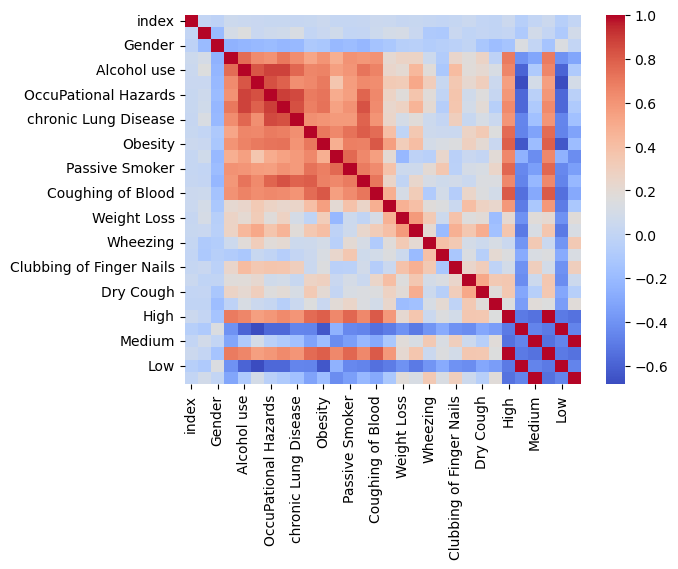

In [16]:
sns.heatmap(corr_matrix,cmap='coolwarm')

# Splitting dataset into training dataset and testing dataset



In [17]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=43)

# Gaussian Model creation




In [18]:
model = GaussianNB()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

# Accuracy checking


In [19]:
accuracy = accuracy_score(y_test,y_pred)
print('Accuracy', accuracy)

Accuracy 1.0
